<div class="frontmatter text-center">
<h1> DNDS 6002: Data and Network Visualization</h1>
<h2> Final project 2 - Temperature joyplot/ridgeline plot </h2>
<h3>Central European University, Fall 2018/2019</h3>
<h3>Student name: Hao CUI </h3>
</div>

<big> <big> <big> **Contents:** </big> </big> </big>

<br> <big> **1. Motivation** </big>
> In Data Visualization class04, we have compared the distribution of temperatures in each month with boxplots.
<br> It would also be interesting to see the temperatures ranges by years, and plot the temperature distributions in one plot using joyplot/ridgeline plot.

<br> <big> **2. Dataset description** </big>
> Dataset taken from data visualization class04
<br> Stockholm temperatures from 1800 to 2011
<br> Dimension: $77431 \times 4$

<br> <big> **3. Data Visualization** </big>
> (1) **First attempt**:
<br> &ensp;&ensp;&ensp; visualize the ridgeline plot of temperatures from year 1800-2011 (212 years),
<br> &ensp;&ensp;&ensp; with year labels every 10 years.
<br> &ensp;&ensp;&ensp; **Disadvantages**: 
<br> &ensp;&ensp;&ensp; the distribution areas are greatly overlapping, former years distributions are hided behind,
<br> &ensp;&ensp;&ensp; it's difficult to see the temperature distributions of each year.
<br>
<br>
(2) **Second attempt**:
<br> &ensp;&ensp;&ensp; select a subdataframe to visualize stockholm temperatures changes in recent 2 decades,
<br> &ensp;&ensp;&ensp; with year labels of each year.
<br> &ensp;&ensp;&ensp; **Advantages**: 
<br> &ensp;&ensp;&ensp; the areas are slightly overlapping, former years distributions are not hided behind, 
<br> &ensp;&ensp;&ensp; it's easy to see the temperature distributions of each year.
<br>
<br>

<br> <big> **4. Discussions** </big>
> (a) Joyplot/ridgeline plots show the distribution of a numeric value for several groups. They can be quite useful for visualizing changes in distributions over time or space. (e.g time series data)
<br> (b) Joyplots are especially interesting when the number of groups to represent is high, and thus a classic window separation would take too much space. 
<br> (c) However be always careful since it hides a part of the data where the overlap takes place. (Sometimes we can manipulate the figure size to reduce the overlap area though.)
<br> (d) It's important and not easy to select a suitable colormap.

### Let's get started!

In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm      #colormap
import joypy

#### See the first few rows of the dataset, starts on the first day of 1800

In [2]:
!head stockholm_temperatures.dat 

1800	1	1	-6.10000000000000
1800	1	2	-15.4000000000000
1800	1	3	-15
1800	1	4	-19.3000000000000
1800	1	5	-16.8000000000000
1800	1	6	-11.4000000000000
1800	1	7	-7.60000000000000
1800	1	8	-7.10000000000000
1800	1	9	-10.1000000000000
1800	1	10	-9.50000000000000


#### See the last few rows of the dataset, ends on the last day of 2011

In [3]:
!tail stockholm_temperatures.dat 

2011	12	22	-0.400000000000000
2011	12	23	3.70000000000000
2011	12	24	3.20000000000000
2011	12	25	4.20000000000000
2011	12	26	8.20000000000000
2011	12	27	8.30000000000000
2011	12	28	2.60000000000000
2011	12	29	4.90000000000000
2011	12	30	0.600000000000000
2011	12	31	-2.60000000000000

#### Load the dataset

In [4]:
data_sweden=np.loadtxt('stockholm_temperatures.dat')

In [5]:
type(data_sweden)

numpy.ndarray

#### Change the dataset to dataframe and rename the columns

In [6]:
df=pd.DataFrame(data_sweden)

In [7]:
#rename columns and convert them to integer
df.columns = ['year', 'month', 'day', 'temp']
df[['year', 'month', 'day']] = df[['year', 'month', 'day']].applymap(np.int64)

In [8]:
len(df)

77431

In [9]:
df.head()

,year,month,day,temp
0,1800,1,1,-6.1
1,1800,1,2,-15.4
2,1800,1,3,-15.0
3,1800,1,4,-19.3
4,1800,1,5,-16.8


### Let's start data visualization!

#### <big> Firstly attempt :</big> make a ridgeline plot of temperatures from 1800-2011 (212 years), with year labels every 10 years. <br> 
**Disadvantages:** the distribution areas are overlapping, and it's difficult to see the distributions of each year.

Text(0.5,1.02,'Stockholm yearly temperatures from 1800-2011')

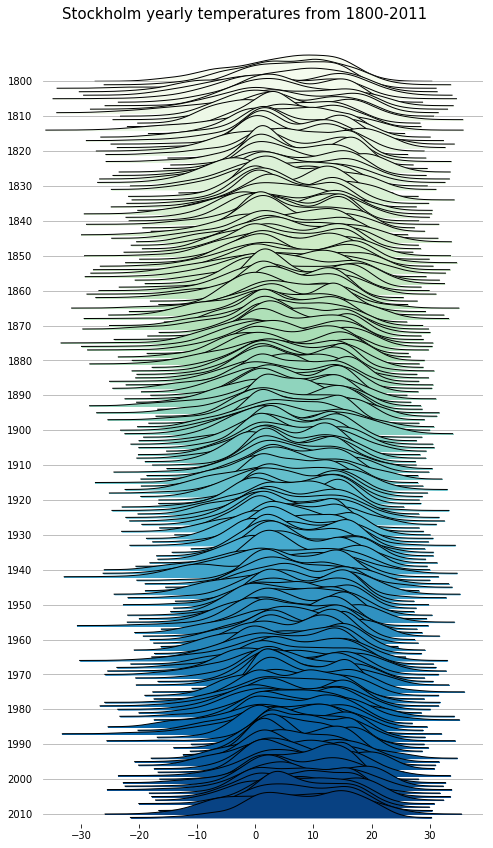

In [17]:
%matplotlib inline

labels=[y if y%10==0 else None for y in list(df.year.unique())] #
fig, axes = joypy.joyplot(df, by="year", column="temp", labels=labels, range_style='own',
                          grid="y", linewidth=1, legend=False, fade=False, figsize=(7,11.5),
                          linecolor="black", colormap=cm.GnBu) 

fig.suptitle("Stockholm yearly temperatures from 1800-2011", size=15, y=1.02) 

In [24]:
fig.savefig("temp0.png") 

#### <big> Second attempt :</big> select a subdataframe to visualize stockholm temperatures changes in recent 2 decades. <br> 
**Advantages**: though the areas are overlapping, former years distributions are not hided behind, it's easy to see the temperature distributions of each year. 

In [13]:
df1=df[-8035:]
df1.head()

,year,month,day,temp
69396,1990,1,1,-2.9
69397,1990,1,2,-4.3
69398,1990,1,3,-3.6
69399,1990,1,4,-0.2
69400,1990,1,5,-0.4


#### The chosen colormap is not the best for this plot. Alternating colormap might be better, but I haven't found out how to do it. 

Text(0.5,1.02,'Stockholm yearly temperatures from 1990-2011')

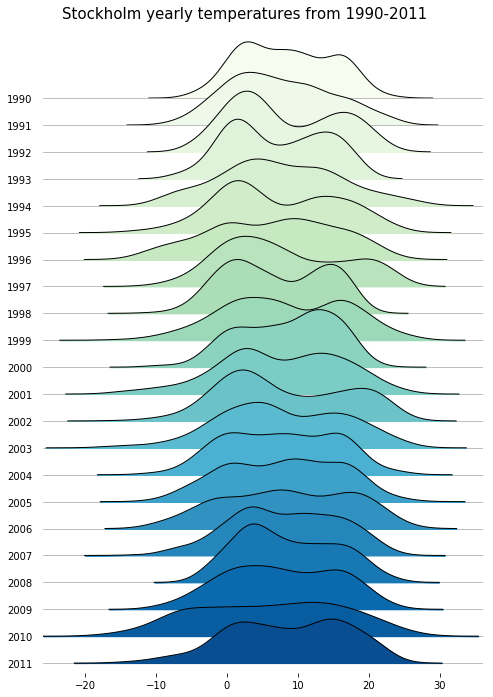

In [20]:
%matplotlib inline

labels=[y  for y in list(df1.year.unique())] #if y%10==0 else None
fig1, axes = joypy.joyplot(df1, by="year", column="temp", labels=labels, range_style='own',
                          grid="y", linewidth=1, legend=False, fade=False, figsize=(7,9.5),
                          linecolor="black", colormap=cm.GnBu) 

fig1.suptitle("Stockholm yearly temperatures from 1990-2011", size=15, y=1.02) 

In [21]:
fig1.savefig("temp1.png") 

#### <big> Discussions :</big> 
<br> (a) Joyplot/ridgeline plots show the distribution of a numeric value for several groups. They can be quite useful for visualizing changes in distributions over time or space. (e.g time series data)
<br> (b) Joyplots are especially interesting when the number of groups to represent is high, and thus a classic window separation would take too much space. 
<br> (c) However be always careful since it hides a part of the data where the overlap takes place. (Sometimes we can manipulate the figure size to reduce the overlap area though.)
<br> (d) It's important and not easy to select a suitable colormap.